In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpldatacursor import datacursor
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv('corona_north_macedonia.csv')

In [3]:
df.tail(1)

,datum,novi_pozitivni,vkupno_novi,izleceni,vkupno_izleceni,pocinati,vkupno_pocinati,active
64,2020-04-30,23,1465,111,738,4,77,650


In [4]:
x_data = np.array(list(range(len(df))))
y_data = np.array(df['vkupno_novi'])
x = np.linspace(1,len(df),len(df))


In [5]:
kvadratni = np.polyfit(x_data,y_data, 2)

In [6]:
y = kvadratni[0]*(x_data**2) + kvadratni[1]*x_data + kvadratni[2]

In [7]:
def func(x, a, b, c):
    return a * np.exp(b * x) + c

In [8]:
def func2(x, a, b):
    return a * np.exp(b * x) 

In [9]:
def func_1(x, b):
    return np.exp(b * x)

In [10]:
popt, pcov = curve_fit(func2, x_data, y_data)

In [11]:
popt1, pcov1 = curve_fit(func_1, x_data, y_data)

In [12]:
popt1

array([0.12055941])

In [13]:
y_exp = func2(x_data, *popt)

In [14]:
y_exp_1 = func_1(x_data, *popt1)

In [15]:
y_exp_original = np.exp(0.2*x_data)

In [16]:
testirani = 2240 + 406 + 480 + 392 + 257 + 342 + 389 + 414 + 371 + 202 + 386 + 351 + 341 + 496 + 586 +404 +330 + 710 + 500 + 660 + 437 + 697 + 314 + 263 + 345 + 660 + 649 + 408 + 728 + 335 + 289 + 362 + 279 + 386


In [34]:
R2 = r2_score(y_data, y_exp)
R2

-3.842769293254791e+19

In [35]:
R2_poly = r2_score(y_data, y)
R2

-3.842769293254791e+19

In [18]:
R2_1 = r2_score(y_data, y_exp_1)
R2_1

0.5749777727424142

In [19]:
R2_original = r2_score(y_exp_original,y_data)
R2_original

-0.1666312986427414

In [20]:
parametri = []
parametri.append(popt[0])
parametri.append(popt[1])
#parametri.append(popt[2])
parametri.append(R2)
parametri = np.array(parametri)
parametri

array([-3.83465111e-15,  1.00000000e+00, -3.84276929e+19])

In [21]:
parametri1 = []
parametri1.append(popt1[0])
parametri1.append(R2_1)
parametri1 = np.array(parametri1)
parametri1

array([0.12055941, 0.57497777])

In [22]:
parametri_original = []
parametri_original.append(0.20)
parametri_original.append(R2_original)
parametri_original = np.array(parametri_original)
parametri_original

array([ 0.2      , -0.1666313])

In [31]:
parametri_poly = []
parametri_poly.append(kvadratni[0])
parametri_poly.append(kvadratni[1])
parametri_poly.append(kvadratni[2])
parametri_poly.append(R2_poly)
parametri_poly = np.array(parametri_poly)
parametri_poly

array([ 0.49845708, -5.9785257 , -8.45642417,  0.98662105])

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600.]), <a list of 10 Text major ticklabel objects>)

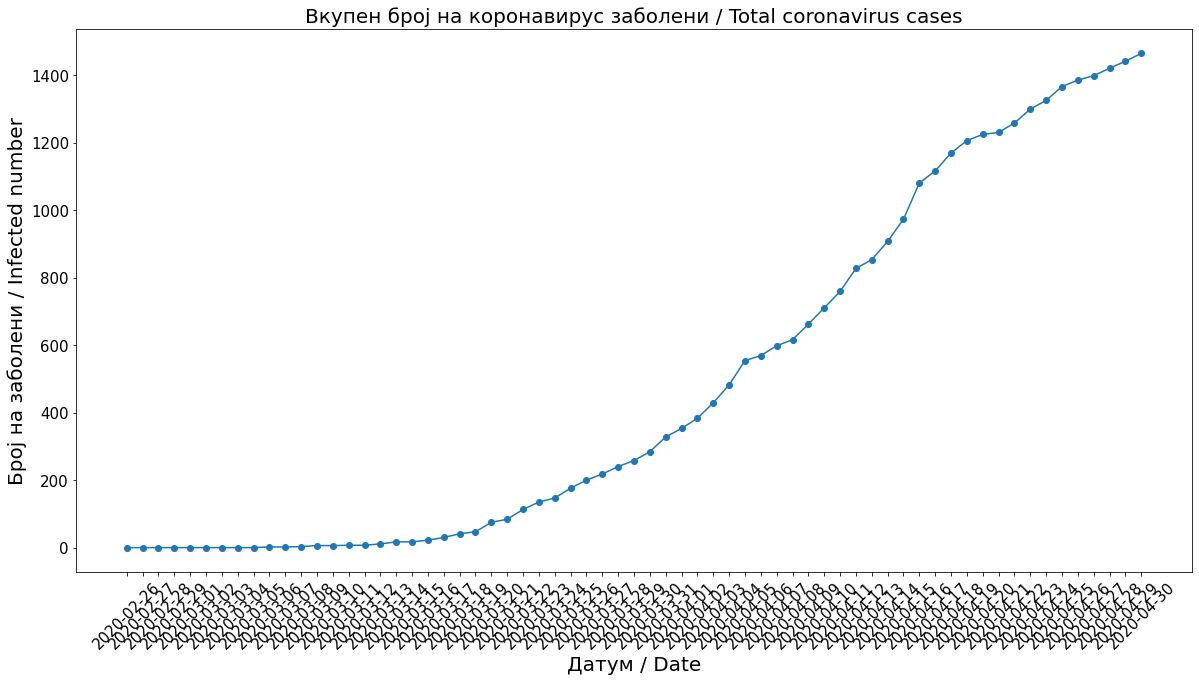

In [23]:
plt.figure(figsize=(20,10))
plt.plot(df['datum'],df['vkupno_novi'], '-o')
plt.title("Вкупен број на коронавирус заболени / Total coronavirus cases", fontsize=20)
plt.xlabel("Датум / Date", fontsize=20)
plt.ylabel("Број на заболени / Infected number", fontsize=20)
plt.xticks(rotation = '45', fontsize=15)
plt.yticks(fontsize=15)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text major ticklabel objects>)

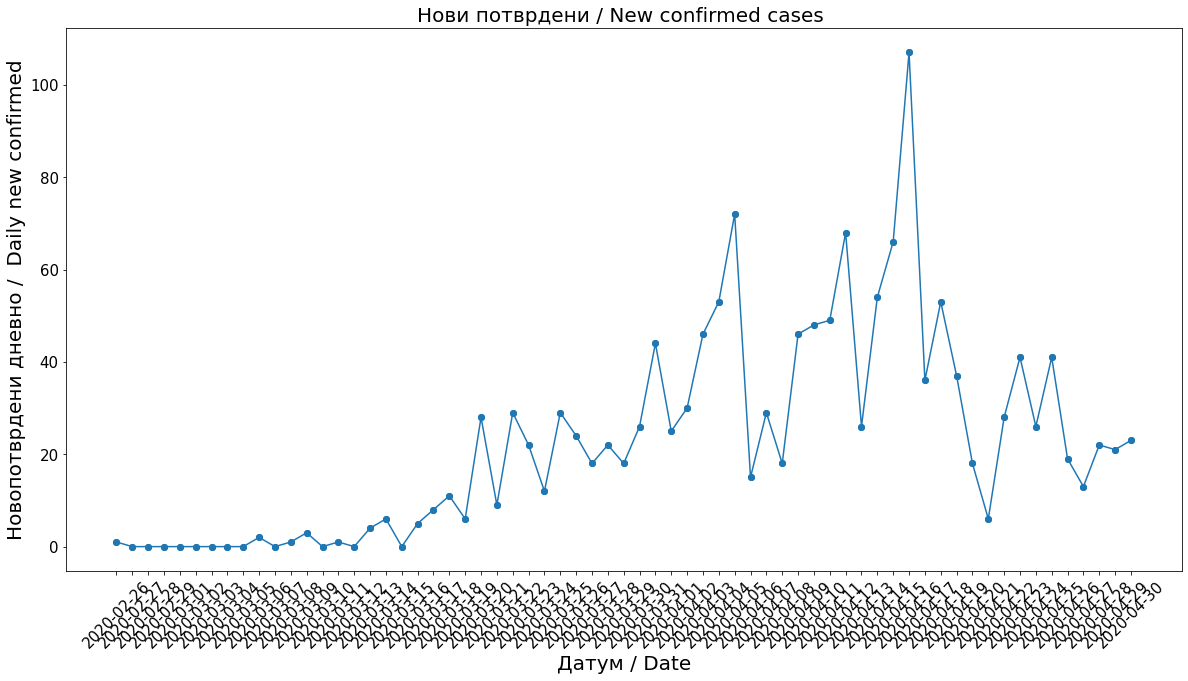

In [24]:
plt.figure(figsize=(20,10))
plt.plot(df['datum'],df['novi_pozitivni'], '-o')
plt.scatter(df['datum'],df['novi_pozitivni'])
plt.title("Нови потврдени / New confirmed cases ", fontsize=20)
plt.xlabel("Датум / Date", fontsize=20)
plt.ylabel("Новопотврдени дневно /  Daily new confirmed", fontsize=20)
plt.xticks(fontsize=15, rotation = '45')
plt.yticks(fontsize=15)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text major ticklabel objects>)

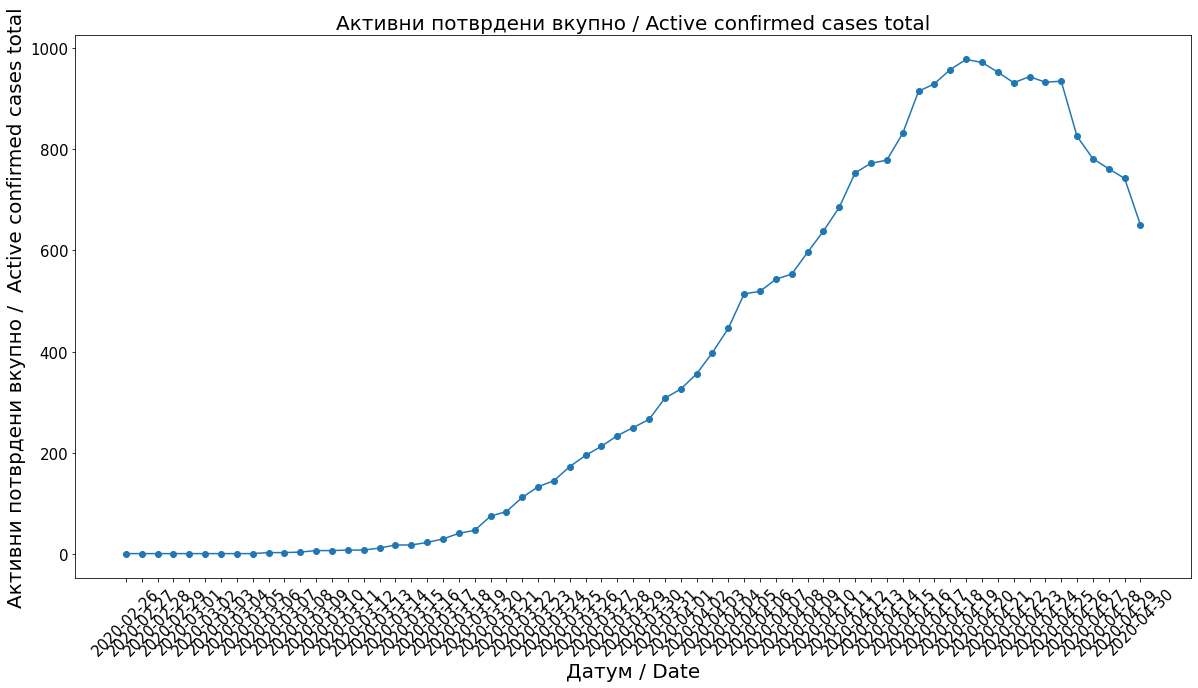

In [25]:
plt.figure(figsize=(20,10))
plt.plot(df['datum'],df['active'], '-o')
plt.title("Активни потврдени вкупно / Active confirmed cases total", fontsize=20)
plt.xlabel("Датум / Date", fontsize=20)
plt.ylabel("Активни потврдени вкупно /  Active confirmed cases total", fontsize=20)
plt.xticks(fontsize=15, rotation = '45')
plt.yticks(fontsize=15)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text major ticklabel objects>)

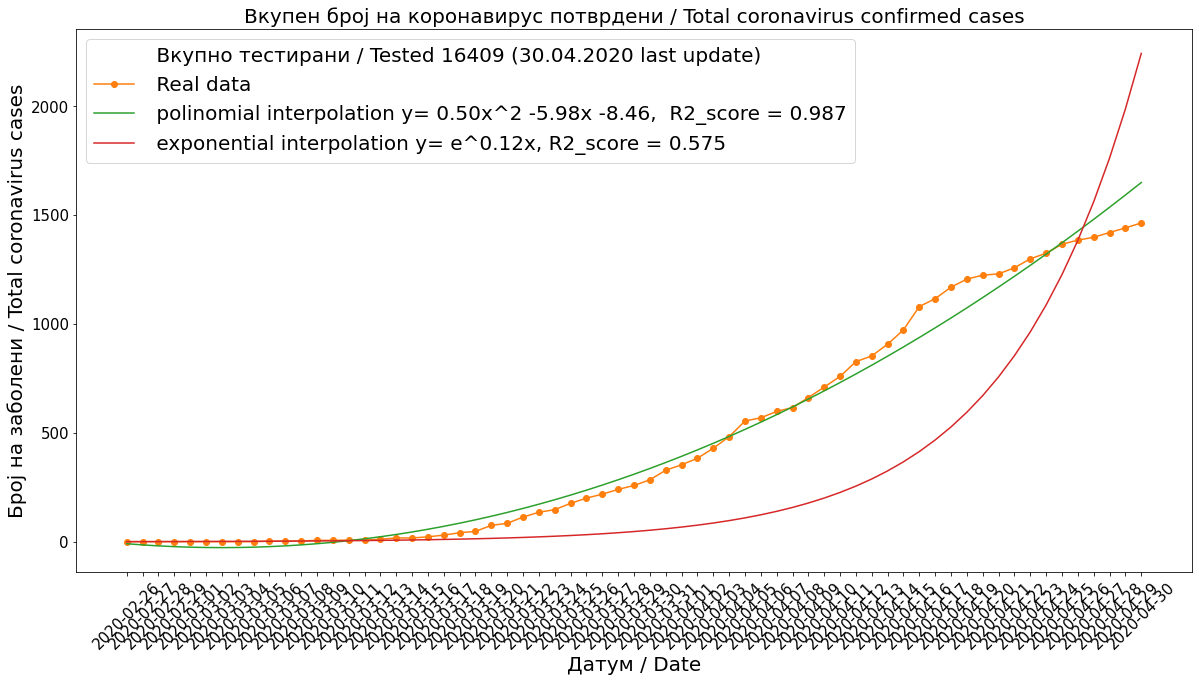

In [32]:
plt.figure(figsize=(20,10))
plt.plot([], [], ' ', label=" Вкупно тестирани / Tested %d (30.04.2020 last update)" %testirani)
plt.plot(df['datum'],df['vkupno_novi'],'-o', label = ' Real data')
plt.plot(df['datum'],y, label = ' polinomial interpolation y= %2.2fx^2 %2.2fx %+2.2f,  R2_score = %2.3f' % tuple(parametri_poly))
plt.plot(df['datum'], y_exp_1, label = ' exponential interpolation y= e^%2.2fx, R2_score = %2.3f ' % tuple(parametri1))
#plt.plot(df['datum'], y_exp, label = ' exponential interpolation y= %2.2fe^%2.2fx %+2.2f, R2_score = %2.3f' % tuple(parametri))
plt.legend(fontsize=20)
plt.title("Вкупен број на коронавирус потврдени / Total coronavirus confirmed cases", fontsize=20)
plt.xlabel("Датум / Date", fontsize=20)
plt.ylabel("Број на заболени / Total coronavirus cases", fontsize=20)
plt.xticks(fontsize=15, rotation = '45')
plt.yticks(fontsize=15)


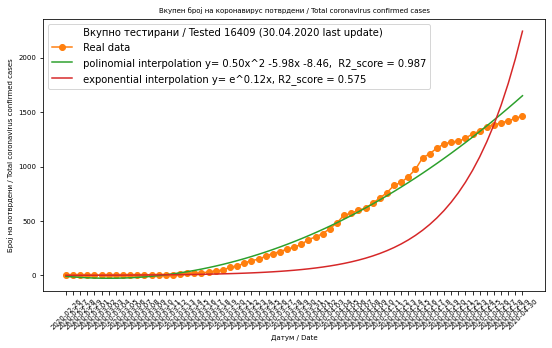

In [33]:
#%matplotlib notebook
### INTERACTIVE
plt.figure(figsize=(9,5))
plt.plot([], [], ' ', label=" Вкупно тестирани / Tested %d (30.04.2020 last update)" %testirani)
plt.plot(df['datum'],df['vkupno_novi'],'-o', label = ' Real data')
plt.plot(df['datum'],y, label = ' polinomial interpolation y= %2.2fx^2 %2.2fx %+2.2f,  R2_score = %2.3f' % tuple(parametri_poly))
plt.plot(df['datum'], y_exp_1, label = ' exponential interpolation y= e^%2.2fx, R2_score = %2.3f ' % tuple(parametri1))
#plt.plot(df['datum'], y_exp, label = ' exponential interpolation y= %2.2fe^%2.2fx %+2.2f, R2_score = %2.3f' % tuple(parametri))
plt.legend(fontsize=10)
plt.title("Вкупен број на коронавирус потврдени / Total coronavirus confirmed cases", fontsize=7)
plt.xlabel("Датум / Date", fontsize=7)
plt.ylabel("Број на потврдени / Total coronavirus confirmed cases", fontsize=7)
plt.xticks(fontsize=7, rotation = '45')
plt.yticks(fontsize=7)
datacursor(hover=True)


In [28]:
# plt.figure(figsize=(20,10))
# plt.plot([], [], ' ', label=" Вкупно тестирани / Tested %d (1.04.2020 last update)" %testirani)
# plt.plot(df['datum'],df['vkupno_novi'],'-o', label = ' Real data')
# #plt.plot(df['datum'],y, label = ' polinomial interpolation y= %2.2fx^2 %2.2fx %+2.2f' % tuple(kvadratni))
# plt.plot(df['datum'], y_exp_1, label = ' exponential interpolation y= e^%2.2fx, R2_score = %2.3f ' % tuple(parametri1))
# plt.plot(df['datum'], y_exp_original, label = ' exponential interpolation y= e^%2.2fx, R2_score = %2.3f' % tuple(parametri_original))
# plt.legend(fontsize=20)
# plt.title("Вкупен број на коронавирус заболени / Total coronavirus cases", fontsize=20)
# plt.xlabel("Датум / Date", fontsize=20)
# plt.ylabel("Број на заболени / Total coronavirus cases", fontsize=20)
# plt.xticks(fontsize=15, rotation = '45')
# plt.yticks(fontsize=15)
